In [4]:
import pandas as pd
import seaborn
from matplotlib import pyplot as plt

def age_group(age: int):
    if age == 18:
        return "18"
    elif age > 18 and age <= 24:
        return "18-24"
    elif age >= 25 and age <= 34:
        return "25-34"
    elif age >= 35 and age <= 44:
        return "35-44"
    elif age >= 45 and age <= 54:
        return "45-54"
    elif age >= 55 and age <= 64:
        return "55-64"
    elif age >= 65:
        return "65+"
   

data = pd.read_csv("C:\\Users\\BottleScript\\PycharmProjects\\dsml\\dds_ch2_nyt\\nyt1.csv")
data_no_null_age = data[data.Age > 0]
data_no_null_age

,Age,Gender,Impressions,Clicks,Signed_In
0,36,0,3,0,1
1,73,1,3,0,1
2,30,0,3,0,1
3,49,1,3,0,1
4,47,1,11,0,1
...,...,...,...,...,...
458432,30,0,4,0,1
458433,21,1,2,0,1
458434,61,1,6,0,1
458435,51,0,7,0,1


In [5]:
data_no_null_age = data_no_null_age.assign(AgeGroup=[age_group(age) for age in data_no_null_age.Age.to_list()])
data_no_null_age


,Age,Gender,Impressions,Clicks,Signed_In,AgeGroup
0,36,0,3,0,1,35-44
1,73,1,3,0,1,65+
2,30,0,3,0,1,25-34
3,49,1,3,0,1,45-54
4,47,1,11,0,1,45-54
...,...,...,...,...,...,...
458432,30,0,4,0,1,25-34
458433,21,1,2,0,1,18-24
458434,61,1,6,0,1,55-64
458435,51,0,7,0,1,45-54


In [6]:
data_groupby = data_no_null_age.groupby("AgeGroup",as_index=False).count()
data_groupby

,AgeGroup,Age,Gender,Impressions,Clicks,Signed_In
0,18,5424,5424,5424,5424,5424
1,18-24,35270,35270,35270,35270,35270
2,25-34,58174,58174,58174,58174,58174
3,35-44,70860,70860,70860,70860,70860
4,45-54,64288,64288,64288,64288,64288
5,55-64,44738,44738,44738,44738,44738
6,65+,28753,28753,28753,28753,28753


<AxesSubplot:xlabel='AgeGroup', ylabel='Clicks'>

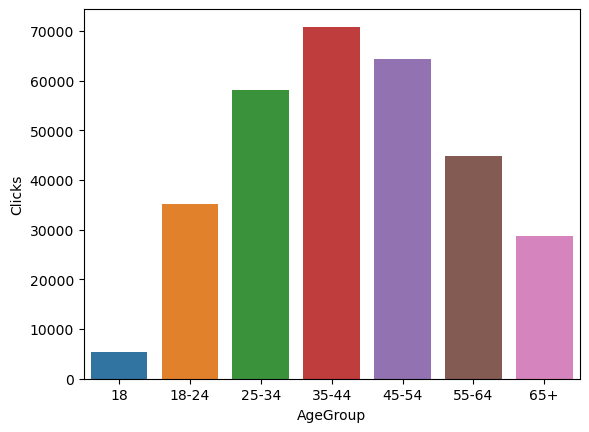

In [7]:
seaborn.barplot(data=data_groupby, x=data_groupby.AgeGroup, y=data_groupby.Clicks)

In [8]:
data_by_gender_and_age = data_no_null_age.groupby(["AgeGroup", "Gender"],as_index=False).count()
data_by_signed_in_and_age = data_no_null_age.groupby(["AgeGroup", "Signed_In"],as_index=False).count()
data_by_signed_in_and_age

,AgeGroup,Signed_In,Age,Gender,Impressions,Clicks
0,18,1,5424,5424,5424,5424
1,18-24,1,35270,35270,35270,35270
2,25-34,1,58174,58174,58174,58174
3,35-44,1,70860,70860,70860,70860
4,45-54,1,64288,64288,64288,64288
5,55-64,1,44738,44738,44738,44738
6,65+,1,28753,28753,28753,28753


<AxesSubplot:xlabel='AgeGroup', ylabel='Clicks'>

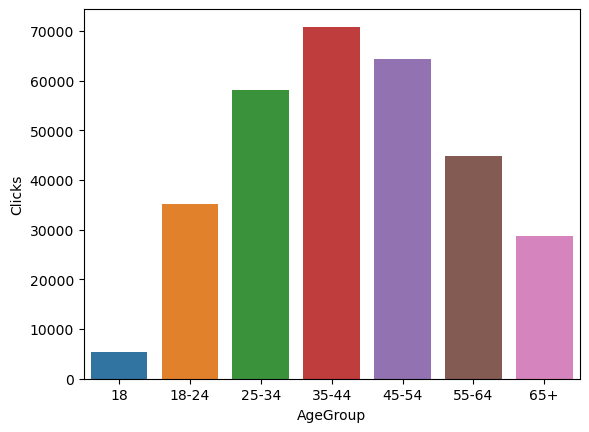

In [9]:
seaborn.barplot(data=data_by_signed_in_and_age, x=data_by_signed_in_and_age.AgeGroup, y=data_by_signed_in_and_age.Clicks)

<AxesSubplot:xlabel='AgeGroup', ylabel='Clicks'>

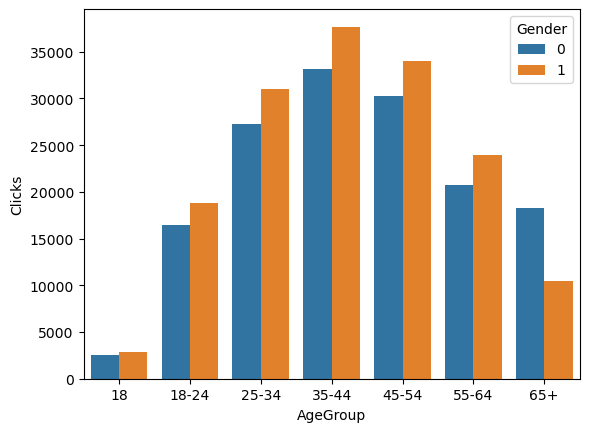

In [10]:
seaborn.barplot(data=data_by_gender_and_age, x=data_by_gender_and_age.AgeGroup, y=data_by_gender_and_age.Clicks, hue=data_by_gender_and_age.Gender)

In [11]:
data_no_null_age["Age"].max()

108

In [12]:
data_no_null_age["Clicks"].max()

3

In [13]:
data_no_null_age["Impressions"].max()

20

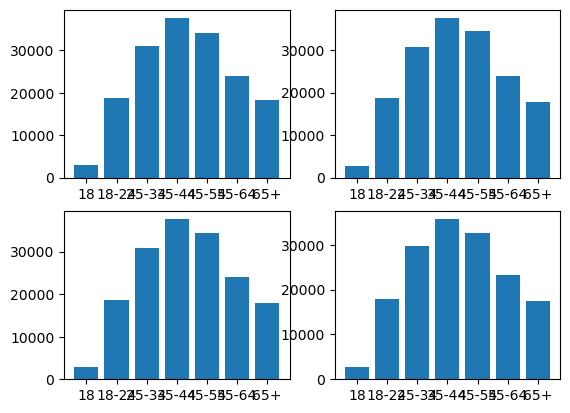

In [15]:
fig,axis = plt.subplots(2, 2)
for i in range(0, 2):
    for j in range(0, 2):
        dataSet = pd.read_csv("C:\\Users\\BottleScript\\PycharmProjects\\dsml\\dds_ch2_nyt\\nyt" + str(i + j + 1) + ".csv")
        data_no_null_age2 = dataSet[dataSet.Age > 0]
        data_no_null_age2.insert(1, "AgeGroup", [age_group(age) for age in data_no_null_age2.Age.to_list()])
        dataSet = data_no_null_age2.groupby(["AgeGroup", "Gender"], as_index=False).count()
        axis[i, j].bar(dataSet.AgeGroup, dataSet.Signed_In)
plt.show()

In [18]:
data_by_gender_and_age = data_no_null_age.groupby(["Gender", "AgeGroup"],as_index=False).count()
data_by_gender_and_age

,Gender,AgeGroup,Age,Impressions,Clicks,Signed_In
0,0,18,2532,2532,2532,2532
1,0,18-24,16441,16441,16441,16441
2,0,25-34,27216,27216,27216,27216
3,0,35-44,33184,33184,33184,33184
4,0,45-54,30281,30281,30281,30281
5,0,55-64,20750,20750,20750,20750
6,0,65+,18308,18308,18308,18308
7,1,18,2892,2892,2892,2892
8,1,18-24,18829,18829,18829,18829
9,1,25-34,30958,30958,30958,30958


<AxesSubplot:xlabel='Gender', ylabel='Clicks'>

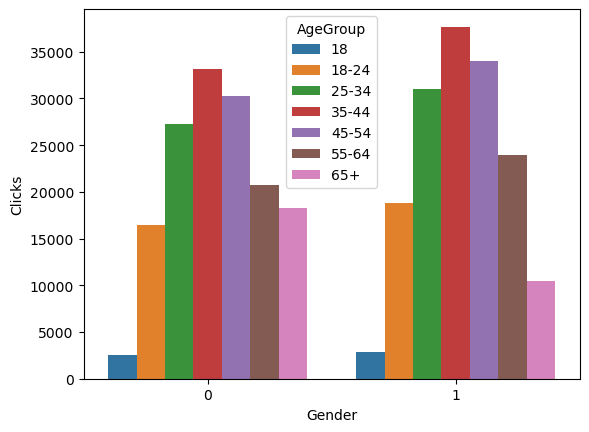

In [19]:
seaborn.barplot(data=data_by_gender_and_age,
                x=data_by_gender_and_age.Gender,
                y=data_by_gender_and_age.Clicks,
                hue=data_by_gender_and_age.AgeGroup)